# Contents List
1. Import libraries
2. Import df from 4.9
3. Security - address PII data
4. Comparison of customer behavior in different geographical areas
5. Create exclusion flag for low_activity (less than 5 orders) exclude them from data 

6.1 Create Parent Status Column

6.2 Baby Order Flag Column

6.3 Baby in the Family Column

6.4 Merge df_buy_baby_products with Original df

6.5 Create 'pet order flag' column

6.6 Create Pet Owner Column

6.7 Merge original df with Pet Owner df

6.8 Create 'Income Group' Profile

7. Customer Profiles Compared in Different US regions

7.1 Count of user_id in each region

7.2 Group by Income Groups

7.3 Group By Income Groups and Regions

7.4 Group by Pet Owner

7.5 Group by Pet Owner in Regions

7.6 Group by Baby in the Family

7.7 Group by Baby in the Family in Regions

7.8 Group by Parent Status

7.9 Group by Parent Status in Regions

8.Visualizations to Show the Distribution of Profiles

8.1 Visualization of Customers and Regional Distribution Profiles

8.2 Visualization of Income Groups and Regional Distribution Profiles

8.3 Visualization of Pet Owner and Regional Distribution

8.4 Visualization of 'Baby in the Family' and Regional Distribution

8.5 Visualization of Parent Status and Regional Distribution

9. Aggregates of max, mean, and min Variables on Customer Profiles

10. Compare Customer Profiles with Regions & Departments with aim to Identify Link

10.1 Income

10.2 Pet Owner

10.3 Baby In the Family

10.4 Parent Status

11. Visualizations of Customer Profiles by Department 


## 1. Import Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import gc

In [2]:
gc.collect()

20

## 2. Import df from 4.9

In [3]:
ords_prods_cust_merged = pd.read_pickle(r'C:\Users\heidi\OneDrive\CareerFoundry\Achievement4 Python Fundamentals for Data Analysts\4.2.Jupyter_Fundamentals_and_Python_Data_Types\Instacart Basket Analysis 16-03-2021\02 Data\Prepared Data\data_vizualization_part_2.pkl')

In [4]:
path = (r'C:\Users\heidi\OneDrive\CareerFoundry\Achievement4 Python Fundamentals for Data Analysts\4.2.Jupyter_Fundamentals_and_Python_Data_Types\Instacart Basket Analysis 16-03-2021')

In [5]:
df = ords_prods_cust_merged

In [6]:
df.shape

(32399732, 30)

In [7]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price_ords', 'spending_flag', 'order_frequency',
       'customer_frequency_flag', 'gender', 'state', 'customer_age',
       'number_of_dependants', 'marital_status', 'annual_income'],
      dtype='object')

In [8]:
df['user_id'] = df['user_id'].astype('int')

In [9]:
df.isnull().sum()

order_id                   0
user_id                    0
order_number               0
orders_day_of_the_week     0
order_hour_of_day          0
days_since_prior_order     0
product_id                 0
add_to_cart_order          0
reordered                  0
_merge                     0
product_name               0
aisle_id                   0
department_id              0
prices                     0
price_range_loc            0
busiest_day                0
busiest_days               0
busiest_period_of_day      0
max_order                  0
loyalty_flag               0
mean_price_ords            0
spending_flag              0
order_frequency            0
customer_frequency_flag    0
gender                     0
state                      0
customer_age               0
number_of_dependants       0
marital_status             0
annual_income              0
dtype: int64

## 3. Security - address PII data

Customer's first and last names were dropped in previous exercises due to privacy issues.

In [10]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,mean_price_ords,spending_flag,order_frequency,customer_frequency_flag,gender,state,customer_age,number_of_dependants,marital_status,annual_income
0,2539329,1,1,2,8,11.11,196,1,0,both,...,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.00,196,1,1,both,...,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.00,196,1,1,both,...,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.00,196,1,1,both,...,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.00,196,1,1,both,...,6.367797,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423


## 4. Comparison of customer behavior in different geographical areas

In [11]:
# Customer behaviour in each state
df['state'].value_counts(dropna = False)

Pennsylvania            667007
California              659695
Rhode Island            656777
Georgia                 656249
New Mexico              654400
Arizona                 653864
North Carolina          651790
Oklahoma                651661
Alaska                  648451
Minnesota               647738
Massachusetts           646275
Wyoming                 644191
Virginia                641280
Missouri                640576
Texas                   640285
Colorado                639173
Maine                   638479
North Dakota            638391
Alabama                 637863
Kansas                  637418
Louisiana               637414
Delaware                636906
South Carolina          636677
Oregon                  636332
Arkansas                636070
Nevada                  636034
New York                635912
Montana                 635181
South Dakota            633649
Illinois                632928
Hawaii                  632786
Washington              632722
Mississi

In [12]:
# Create 'regional segmentation' of data

In [13]:
regions = []

for value in df['state']:
    if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
        regions.append('Northeast')
    elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
        regions.append('Midwest')
    elif value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'West Virginia' or value == 'Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':        
        regions.append('South')
    elif value == 'Idaho' or value == 'Montana' or value == 'Wyoming' or value == 'Nevada' or value == 'Utah' or value == 'Colorado' or value == 'Arizona' or value == 'New Mexico' or value == 'Alaska' or value == 'Washington' or value == 'Oregon' or value == 'California' or value == 'Hawaii':
        regions.append('West')
    else:
        regions.append('Error')    



In [14]:
# Create new variable to represent customer in regions
df['state_region'] = regions

In [15]:
# Customer behaviour in each region
df['state_region'].value_counts(dropna = False)

South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: state_region, dtype: int64

In [16]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,spending_flag,order_frequency,customer_frequency_flag,gender,state,customer_age,number_of_dependants,marital_status,annual_income,state_region
0,2539329,1,1,2,8,11.11,196,1,0,both,...,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423,South
1,2398795,1,2,3,7,15.00,196,1,1,both,...,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423,South
2,473747,1,3,3,12,21.00,196,1,1,both,...,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423,South
3,2254736,1,4,4,7,29.00,196,1,1,both,...,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423,South
4,431534,1,5,4,15,28.00,196,1,1,both,...,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423,South


Is there a difference in customer spending habits between US regions? 

Conclusion: There IS a difference in customer spending habits between US regions: 
High spenders in US regions from high to low is: South, West, Midwest and Northeast.
Similarly, low spenders in US regions from high to low is: South, West, Midwest and Northeast.

In [17]:
# A closer look into customer regional spending habits
# Median prices of products bought by customers in respective regions
df.groupby('state_region').agg({'prices': ['median', 'sum']})

prices              
             median           sum
state_region                     
Midwest         7.4  5.919298e+07
Northeast       7.4  4.453011e+07
South           7.4  8.410791e+07
West            7.4  6.459513e+07

No differences in median prices paid by customers in respective regions.
In order of largest to less percentages of prices paid per region: South, West, Midwest, and Northeast.

In [18]:
# Total number of orders by region
df.groupby('state_region').agg({'order_number' : ['sum']})

,order_number
,sum
state_region,
Midwest,128567248
Northeast,98508722
South,185061001
West,143278540


In order of largest to less orders per region: South, West, Midwest, and Northeast.

In [19]:
# Median order hour in regions
df.groupby(['state_region']).agg({'order_hour_of_day' : ['median']})

,order_hour_of_day
,median
state_region,
Midwest,13
Northeast,13
South,13
West,13


No difference in the central tendency of daily order hour between regions.

In [306]:
# Median orders_day_of_the_week by regions
df.groupby(['state_region']).agg({'orders_day_of_the_week' : ['mean']})

,orders_day_of_the_week
,mean
state_region,
Midwest,2.747392
Northeast,2.740971
South,2.751614
West,2.748497


No difference in the central tendency of orders_day_of_the_week between regions; with busiest day being Wednesdays.

In [305]:
# Median days since prior order by regions
df.groupby(['state_region']).agg({'days_since_prior_order' : ['median']})

,days_since_prior_order
,median
state_region,
Midwest,7.0
Northeast,7.0
South,7.0
West,7.0


No difference in the central tendency of days since prior order between regions.

In [22]:
# Mean order_hour_of_day is from 6 to 9 in the morning as this is when the most orders take place.
df.groupby(['order_hour_of_day']).agg({'order_number' : ['mean']})

,order_number
,mean
order_hour_of_day,
0,15.798365
1,15.398131
2,15.744377
3,16.275220
4,17.016700
5,18.304398
6,19.558072
7,19.735891


Customers spend the most money between 4 and 9 in the morning as this is when the most orders are placed.

Conclusion: US regions have similarities in the spending habits of higher and lower spenders in the following variables: prices paid, daily order hour and days since prior orders; with the exception of 'total number of sales' and 'total number of orders' by customers'. 

In [23]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,spending_flag,order_frequency,customer_frequency_flag,gender,state,customer_age,number_of_dependants,marital_status,annual_income,state_region
0,2539329,1,1,2,8,11.11,196,1,0,both,...,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423,South
1,2398795,1,2,3,7,15.00,196,1,1,both,...,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423,South
2,473747,1,3,3,12,21.00,196,1,1,both,...,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423,South
3,2254736,1,4,4,7,29.00,196,1,1,both,...,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423,South
4,431534,1,5,4,15,28.00,196,1,1,both,...,Low spender,20.0,Regular customer,Female,Alabama,31,3,married,40423,South



## 5. Create exclusion flag for low_activity (less than 5 orders) exclude them from data

In [24]:
# Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.
df.shape

(32399732, 31)

In [25]:
df.loc[df['order_number'] < 5, 'activity_flag'] = 'low_activity'

In [26]:
df.loc[df['order_number'] >= 5, 'activity_flag'] = 'high_activity'

In [27]:
# Frequency counts new 'activity_flag'
df['activity_flag'].value_counts(dropna = False)

high_activity    24411166
low_activity      7988566
Name: activity_flag, dtype: int64

In [28]:
# Create df of exclusively 'low_activity' customers
df_low_activity = df[df.activity_flag == 'low_activity']

In [29]:
# Number of 'low_activity' customers
df_low_activity.shape

(7988566, 32)

In [30]:
# Frequency counts in 'low_activity' df
df_low_activity['activity_flag'].value_counts(dropna = False)

low_activity    7988566
Name: activity_flag, dtype: int64

In [31]:
# Export df_low_activity
df_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data', '4.10_low_activity.pkl'))

In [32]:
# Update current df to exclude 'low_activity' customers
df = df[df.activity_flag == 'high_activity']

In [33]:
# Check values in high_activity df
df.shape

(24411166, 32)

In [34]:
# Frequency counts in 'high_activity' df
df['activity_flag'].value_counts(dropna = False)

high_activity    24411166
Name: activity_flag, dtype: int64

In [35]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency,customer_frequency_flag,gender,state,customer_age,number_of_dependants,marital_status,annual_income,state_region,activity_flag
4,431534,1,5,4,15,28.0,196,1,1,both,...,20.0,Regular customer,Female,Alabama,31,3,married,40423,South,high_activity
5,3367565,1,6,2,7,19.0,196,1,1,both,...,20.0,Regular customer,Female,Alabama,31,3,married,40423,South,high_activity
6,550135,1,7,1,9,20.0,196,1,1,both,...,20.0,Regular customer,Female,Alabama,31,3,married,40423,South,high_activity
7,3108588,1,8,1,14,14.0,196,2,1,both,...,20.0,Regular customer,Female,Alabama,31,3,married,40423,South,high_activity
8,2295261,1,9,1,16,0.0,196,4,1,both,...,20.0,Regular customer,Female,Alabama,31,3,married,40423,South,high_activity


In [36]:
# Export result of customers with high activity
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_high_activity_included.pkl'))

# 6.
Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependants. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

## 6.1 Create Parent Status Column

In [37]:
# Import 'high_activity' dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_high_activity_included.pkl'))

In [38]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price_ords', 'spending_flag', 'order_frequency',
       'customer_frequency_flag', 'gender', 'state', 'customer_age',
       'number_of_dependants', 'marital_status', 'annual_income',
       'state_region', 'activity_flag'],
      dtype='object')

In [39]:
# Create parent_status Column
df ['parent_status'] = ''

In [40]:
df.loc[((df['customer_age'] >= 18) & (df['customer_age'] <=35) & (df['number_of_dependants'] >= 1)), 'parent_status'] = 'young parent'

In [41]:
df.loc[((df['customer_age'] >35) & (df['customer_age'] <= 55) & (df['number_of_dependants'] >= 1)), 'parent_status'] = 'middle aged parent'

In [42]:
df.loc[(df['customer_age'] > 55)  & (df['number_of_dependants'] >= 1), 'parent_status'] = 'older parent'

In [43]:
df.loc[(df['number_of_dependants'] == 0), 'parent_status'] = 'no dependants'

In [44]:
# View columns
df_parent_status = df['parent_status'].value_counts(dropna = False)
df_parent_status

older parent          7366014
no dependants         6104110
middle aged parent    5760382
young parent          5180660
Name: parent_status, dtype: int64

In [45]:
# Mean parent_status and number of dependants
df.groupby(['parent_status']).agg({'number_of_dependants' : ['mean']})

,number_of_dependants
,mean
parent_status,
middle aged parent,1.995744
no dependants,0.000000
older parent,2.007259
young parent,2.004332


Conclusion: Parents accross all age groups have a mean of 2 children per household.

## 6.2 Baby Order Flag Column

In [46]:
# Create baby_order_flag column
df['baby_order_flag'] = ''

In [47]:
# Create baby order variable based on department_id nr. 18 (baby goods)
df.loc[(df['department_id'] == 18), 'baby_order_flag'] = 1

In [48]:
df.loc[(df['department_id'] != 18), 'baby_order_flag'] = 0

In [49]:
# View value counts
df['baby_order_flag'].value_counts (dropna = False)

0    24075219
1      335947
Name: baby_order_flag, dtype: int64

In [50]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,gender,state,customer_age,number_of_dependants,marital_status,annual_income,state_region,activity_flag,parent_status,baby_order_flag
4,431534,1,5,4,15,28.0,196,1,1,both,...,Female,Alabama,31,3,married,40423,South,high_activity,young parent,0
5,3367565,1,6,2,7,19.0,196,1,1,both,...,Female,Alabama,31,3,married,40423,South,high_activity,young parent,0
6,550135,1,7,1,9,20.0,196,1,1,both,...,Female,Alabama,31,3,married,40423,South,high_activity,young parent,0
7,3108588,1,8,1,14,14.0,196,2,1,both,...,Female,Alabama,31,3,married,40423,South,high_activity,young parent,0
8,2295261,1,9,1,16,0.0,196,4,1,both,...,Female,Alabama,31,3,married,40423,South,high_activity,young parent,0


## 6.3 Baby in the Family Column

In [51]:
df_baby_grouped = df.groupby('user_id').agg({'baby_order_flag':'sum'})

In [52]:
# Create column: baby_in_the_family
df_baby_grouped['baby_in_the_family'] = ''

In [53]:
df_baby_grouped.loc[(df_baby_grouped['baby_order_flag'] >= 1), 'baby_in_the_family'] = 'baby_in_the_family'

In [54]:
df_baby_grouped.loc[(df_baby_grouped['baby_order_flag'] == 0), 'baby_in_the_family'] = 'no_baby_in_the_family'

In [55]:
df_baby_grouped.shape

(162631, 2)

In [56]:
df_baby_grouped.head()

,baby_order_flag,baby_in_the_family
user_id,,
1,0,no_baby_in_the_family
2,0,no_baby_in_the_family
3,0,no_baby_in_the_family
4,0,no_baby_in_the_family
7,0,no_baby_in_the_family


## 6.4 Merge df_buy_baby_products with Original df

In [57]:
# Left join df with 'df_buy_baby_products'
df = df.merge(df_baby_grouped, on = 'user_id', how = 'left')

In [58]:
df.shape

(24411166, 36)

In [59]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,customer_age,number_of_dependants,marital_status,annual_income,state_region,activity_flag,parent_status,baby_order_flag_x,baby_order_flag_y,baby_in_the_family
0,431534,1,5,4,15,28.0,196,1,1,both,...,31,3,married,40423,South,high_activity,young parent,0,0,no_baby_in_the_family
1,3367565,1,6,2,7,19.0,196,1,1,both,...,31,3,married,40423,South,high_activity,young parent,0,0,no_baby_in_the_family
2,550135,1,7,1,9,20.0,196,1,1,both,...,31,3,married,40423,South,high_activity,young parent,0,0,no_baby_in_the_family
3,3108588,1,8,1,14,14.0,196,2,1,both,...,31,3,married,40423,South,high_activity,young parent,0,0,no_baby_in_the_family
4,2295261,1,9,1,16,0.0,196,4,1,both,...,31,3,married,40423,South,high_activity,young parent,0,0,no_baby_in_the_family


In [60]:
# Drop 'baby_order_flag' columns
df = df.drop(columns = ['baby_order_flag_x', 'baby_order_flag_y'])

In [61]:
# Check columns dropped
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,gender,state,customer_age,number_of_dependants,marital_status,annual_income,state_region,activity_flag,parent_status,baby_in_the_family
0,431534,1,5,4,15,28.0,196,1,1,both,...,Female,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family
1,3367565,1,6,2,7,19.0,196,1,1,both,...,Female,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family
2,550135,1,7,1,9,20.0,196,1,1,both,...,Female,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family
3,3108588,1,8,1,14,14.0,196,2,1,both,...,Female,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family
4,2295261,1,9,1,16,0.0,196,4,1,both,...,Female,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family


In [62]:
# Export df with baby_in_the_family column
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_baby_in_the_family.pkl'))

## Create 'Pet Owner' Profile

In [63]:
# Import df with baby_in_the_family column
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_baby_in_the_family.pkl'))

## 6.5 Create 'pet order flag' column

In [64]:
# Create pet order flag
df['pet_order_flag'] = ''

In [65]:
# Create pet order flag based on department_id nr. 8 (pet goods)
df.loc[(df['department_id'] == 8), 'pet_order_flag'] = 1

In [66]:
df.loc[(df['department_id'] != 8), 'pet_order_flag'] = 0

In [67]:
df['pet_order_flag'].value_counts (dropna = False)

0    24339055
1       72111
Name: pet_order_flag, dtype: int64

In [68]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,state,customer_age,number_of_dependants,marital_status,annual_income,state_region,activity_flag,parent_status,baby_in_the_family,pet_order_flag
0,431534,1,5,4,15,28.0,196,1,1,both,...,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,0
1,3367565,1,6,2,7,19.0,196,1,1,both,...,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,0
2,550135,1,7,1,9,20.0,196,1,1,both,...,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,0
3,3108588,1,8,1,14,14.0,196,2,1,both,...,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,0
4,2295261,1,9,1,16,0.0,196,4,1,both,...,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,0


In [69]:
df.shape

(24411166, 35)

In [70]:
# Export
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'pet_order_flag_4.10.pkl'))

## 6.6 Create Pet Owner Column

In [71]:
# Import 
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'pet_order_flag_4.10.pkl')) 

In [72]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,state,customer_age,number_of_dependants,marital_status,annual_income,state_region,activity_flag,parent_status,baby_in_the_family,pet_order_flag
0,431534,1,5,4,15,28.0,196,1,1,both,...,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,0
1,3367565,1,6,2,7,19.0,196,1,1,both,...,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,0
2,550135,1,7,1,9,20.0,196,1,1,both,...,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,0
3,3108588,1,8,1,14,14.0,196,2,1,both,...,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,0
4,2295261,1,9,1,16,0.0,196,4,1,both,...,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,0


In [73]:
df.shape

(24411166, 35)

In [74]:
# Group by 'user_id' and sum of orders in dept 8 per 'user_id' - pet_order_flag
df_grouped = df.groupby('user_id').agg({'pet_order_flag' : 'sum'})

In [75]:
# Create Pet Owner Column
df_grouped['pet_owner'] = ''

In [76]:
# If user had 1 or more orders in dept 8
df_grouped.loc[(df_grouped['pet_order_flag'] >= 1), 'pet_owner'] = 'pet owner'

In [77]:
# If user has no orders in dept 8
df_grouped.loc[(df_grouped['pet_order_flag'] == 0), 'pet_owner'] = 'not pet owner'

In [78]:
df_grouped.head()

,pet_order_flag,pet_owner
user_id,,
1,0,not pet owner
2,0,not pet owner
3,0,not pet owner
4,0,not pet owner
7,1,pet owner


In [79]:
# Drop pet_order_flag column
df_grouped = df_grouped.drop(columns = ('pet_order_flag'))

In [80]:
df_grouped.shape

(162631, 1)

In [81]:
# Export grouped pet_order_flag
df_grouped.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'grouped_pet_order_flag_4.10.pkl'))

## 6.7 Merge original df with Pet Owner df

In [82]:
# Import pet_order_flag
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'pet_order_flag_4.10.pkl'))

In [83]:
# Import grouped pet_order_flag
df_grouped.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'grouped_pet_order_flag_4.10.pkl'))

In [84]:
df = df.merge(df_grouped, on = 'user_id', how = 'right')

In [85]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,customer_age,number_of_dependants,marital_status,annual_income,state_region,activity_flag,parent_status,baby_in_the_family,pet_order_flag,pet_owner
0,431534,1,5,4,15,28.0,196,1,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,0,not pet owner
1,3367565,1,6,2,7,19.0,196,1,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,0,not pet owner
2,550135,1,7,1,9,20.0,196,1,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,0,not pet owner
3,3108588,1,8,1,14,14.0,196,2,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,0,not pet owner
4,2295261,1,9,1,16,0.0,196,4,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,0,not pet owner


In [86]:
df = df.drop(columns = ['pet_order_flag'])

In [87]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,state,customer_age,number_of_dependants,marital_status,annual_income,state_region,activity_flag,parent_status,baby_in_the_family,pet_owner
0,431534,1,5,4,15,28.0,196,1,1,both,...,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner
1,3367565,1,6,2,7,19.0,196,1,1,both,...,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner
2,550135,1,7,1,9,20.0,196,1,1,both,...,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner
3,3108588,1,8,1,14,14.0,196,2,1,both,...,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner
4,2295261,1,9,1,16,0.0,196,4,1,both,...,Alabama,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner


## 6.8 Create 'Income Group' Profile

In [88]:
# Create income column
df['income_group'] = ''

In [89]:
df.loc[(df['annual_income'] < 40100), 'income_group'] = 'Lower income'

In [90]:
df.loc[(df['annual_income'] >= 40100) & (df['annual_income'] < 120000), 'income_group']  = 'Middle income'


In [91]:
df.loc[(df['annual_income'] >= 120000), 'income_group'] = 'High income'

In [92]:
df['income_group'].value_counts(dropna = False)

Middle income    15912610
High income       7248133
Lower income      1250423
Name: income_group, dtype: int64

In [93]:
income = pd.crosstab(df['annual_income'], df['income_group'], dropna=False )

In [94]:
income

income_group,High income,Lower income,Middle income
annual_income,,,
25903,0,11,0
25911,0,11,0
25937,0,10,0
25941,0,12,0
25955,0,367,0
...,...,...,...
584097,783,0,0
590790,20,0,0
591089,143,0,0


In [95]:
income.to_clipboard()

In [96]:
df.head(50)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,customer_age,number_of_dependants,marital_status,annual_income,state_region,activity_flag,parent_status,baby_in_the_family,pet_owner,income_group
0,431534,1,5,4,15,28.0,196,1,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner,Middle income
1,3367565,1,6,2,7,19.0,196,1,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner,Middle income
2,550135,1,7,1,9,20.0,196,1,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner,Middle income
3,3108588,1,8,1,14,14.0,196,2,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner,Middle income
4,2295261,1,9,1,16,0.0,196,4,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner,Middle income
5,2550362,1,10,4,8,30.0,196,1,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner,Middle income
6,431534,1,5,4,15,28.0,12427,2,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner,Middle income
7,3367565,1,6,2,7,19.0,12427,2,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner,Middle income
8,550135,1,7,1,9,20.0,12427,3,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner,Middle income
9,3108588,1,8,1,14,14.0,12427,1,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner,Middle income


In [97]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price_ords', 'spending_flag', 'order_frequency',
       'customer_frequency_flag', 'gender', 'state', 'customer_age',
       'number_of_dependants', 'marital_status', 'annual_income',
       'state_region', 'activity_flag', 'parent_status', 'baby_in_the_family',
       'pet_owner', 'income_group'],
      dtype='object')

## 7. Customer Profiles Compared in Different US regions

In [98]:
# Export df consisting of only customer profile variables
df_cust_profile = (os.path.join(path, '02 Data', 'Prepared Data', 'only_customer_variables_4.10.pkl'))

## 7.1 Count of user_id in each region

In [99]:
# Create df limited to applicable columns
df_customer_profile = df[['user_id', 'state_region', 'department_id', 'spending_flag', 'parent_status', 'income_group', 'baby_in_the_family', 'pet_owner']]

In [100]:
# View customer profile
df_customer_profile.head()

,user_id,state_region,department_id,spending_flag,parent_status,income_group,baby_in_the_family,pet_owner
0,1,South,7,Low spender,young parent,Middle income,no_baby_in_the_family,not pet owner
1,1,South,7,Low spender,young parent,Middle income,no_baby_in_the_family,not pet owner
2,1,South,7,Low spender,young parent,Middle income,no_baby_in_the_family,not pet owner
3,1,South,7,Low spender,young parent,Middle income,no_baby_in_the_family,not pet owner
4,1,South,7,Low spender,young parent,Middle income,no_baby_in_the_family,not pet owner


In [101]:
df_customer_profile.shape

(24411166, 8)

In [102]:
df_region = df_customer_profile.groupby('state_region').agg({'user_id': ['nunique']})

In [103]:
# View result
df_region

,user_id
,nunique
state_region,
Midwest,38376
Northeast,28581
South,54193
West,41481


## 7.2 Group by Income Groups

In [104]:
df_income = df_customer_profile.groupby('income_group').aggregate({'user_id': ['nunique']})

In [105]:
# View income groups
df_income

,user_id
,nunique
income_group,
High income,45292
Lower income,12736
Middle income,104603


## 7.3 Group By Income Groups and Regions

In [106]:
df_income_region = df_customer_profile.groupby(['income_group', 'state_region']).agg({'user_id' : ['nunique']})

In [107]:
df_income_region

user_id
                           nunique
income_group  state_region        
High income   Midwest        10838
              Northeast       8005
              South          14921
              West           11528
Lower income  Midwest         2962
              Northeast       2279
              South           4234
              West            3261
Middle income Midwest        24576
              Northeast      18297
              South          35038
              West           26692

## 7.4 Group by Pet Owner

In [108]:
df_pet_owner = df_customer_profile.groupby('pet_owner').agg({'user_id': ['nunique']})

In [109]:
df_pet_owner

,user_id
,nunique
pet_owner,
not pet owner,151786
pet owner,10845


## 7.5 Group by Pet Owner in Regions

In [110]:
df_pet_owner_regions = df_customer_profile.groupby(['pet_owner', 'state_region']).agg({'user_id': ['nunique']})

In [111]:
df_pet_owner_regions

user_id
                           nunique
pet_owner     state_region        
not pet owner Midwest        35806
              Northeast      26702
              South          50643
              West           38635
pet owner     Midwest         2570
              Northeast       1879
              South           3550
              West            2846

Highest number of pet-owners are in South, followed by West, Midwest, and Northeast.
Highest number of non-pet-owners are in South, followed by West, Midwest, and Northeast.

## 7.6 Group by Baby in the Family

In [112]:
df_baby = df_customer_profile.groupby('baby_in_the_family').agg({'user_id': ['nunique']})

In [113]:
df_baby

,user_id
,nunique
baby_in_the_family,
baby_in_the_family,25771
no_baby_in_the_family,136860


## 7.7 Group by Baby in the Family in Regions

In [114]:
df_baby_region = df_customer_profile.groupby(['baby_in_the_family', 'state_region']).agg({'user_id': ['nunique']})

In [115]:
df_baby_region

user_id
                                   nunique
baby_in_the_family    state_region        
baby_in_the_family    Midwest         6161
                      Northeast       4492
                      South           8612
                      West            6506
no_baby_in_the_family Midwest        32215
                      Northeast      24089
                      South          45581
                      West           34975

Highest number of families with babies are in the South, followed by West, Midwest, and Northeast.
Highest number of families without babies are in the South, followed by West, Midwest, and Northeast.

## 7.8 Group by Parent Status

In [116]:
df_parent_status = df_customer_profile.groupby('parent_status').agg({'user_id': ['nunique']})

In [117]:
df_parent_status

,user_id
,nunique
parent_status,
middle aged parent,38207
no dependants,40727
older parent,49536
young parent,34161


## 7.9 Group by Parent Status in Regions

In [118]:
df_parent_status_region = df_customer_profile.groupby(['parent_status', 'state_region']).agg({'user_id': ['nunique']})

In [119]:
df_parent_status_region

user_id
                                nunique
parent_status      state_region        
middle aged parent Midwest         9109
                   Northeast       6760
                   South          12656
                   West            9682
no dependants      Midwest         9566
                   Northeast       7255
                   South          13537
                   West           10369
older parent       Midwest        11691
                   Northeast       8688
                   South          16557
                   West           12600
young parent       Midwest         8010
                   Northeast       5878
                   South          11443
                   West            8830

## 7.10 Classifications of demographic information

In [120]:
# Customer age classification
customer_age_classification = df['customer_age'].value_counts (dropna = False)
customer_age_classification

48    403505
49    403078
79    402245
31    401513
64    400443
       ...  
28    363865
60    361703
66    356175
41    352930
25    352927
Name: customer_age, Length: 64, dtype: int64

In [121]:
customer_age_classification.to_clipboard()

## 8. Visualizations to Show the Distribution of Profiles

## 8.1 Visualization of Customers and Regional Distribution Profiles

Text(0.5, 1.0, 'Customers per Region')

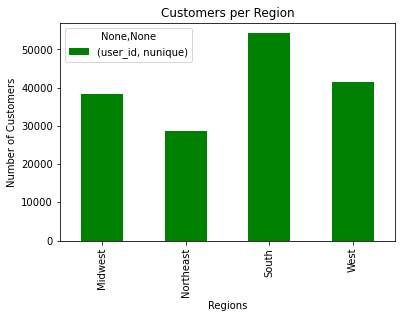

In [122]:
# 8.1 Bar Chart of Customers per Region
bar_user_region = df_region.plot.bar(color = ['green'])
plt.xlabel('Regions')
plt.ylabel('Number of Customers')
plt.title('Customers per Region')

The South has significantly higher number of customers per region. 

In [123]:
# Export bar chart
bar_user_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10._bar_user_region_.png'), dpi=300, bbox_inches='tight')

## 8.2 Visualization of Income Groups and Regional Distribution Profiles

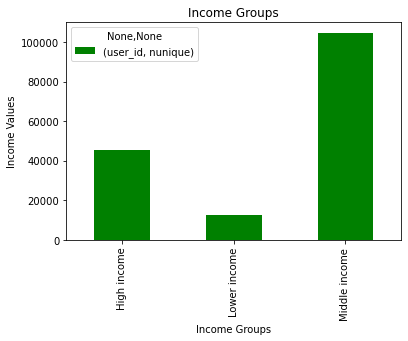

In [124]:
# 8.2.1 Bar Chart of Income Groups
bar_income = df_income.plot.bar(color = ['green'])
plt.xlabel('Income Groups')
plt.ylabel('Income Values')
plt.title('Income Groups')
plt.savefig('Income Groups')

In [125]:
# Export bar chart
bar_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10._bar_income.png'), dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Income Profiles in Region')

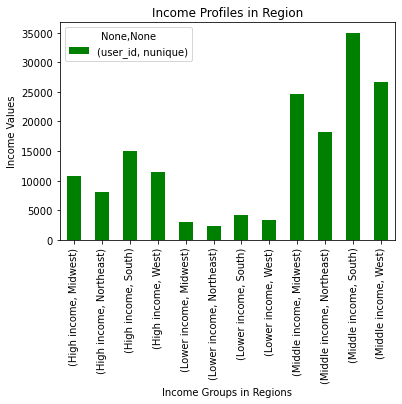

In [126]:
# 8.2.2 Bar Chart of Income Groups in Regions
bar_income_region = df_income_region.plot.bar(color = ['green'])
plt.xlabel('Income Groups in Regions')
plt.ylabel('Income Values')
plt.title('Income Profiles in Region')

The highest number of customers are from a middle income group and from highest to lowest number per region are from the Midwest, Northeast, South and West respectively.
The second highest number are from the high income customer group in a similar regional order.
Lastly the lower income also in a similar regional order from high to low.

In [127]:
# Export Income Profiles in Region bar chart
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10_bar_income_region.png'), dpi=300, bbox_inches='tight')

## 8.3 Visualization of Pet Owner and Regional Distribution

Text(0.5, 1.0, 'Pet Owners')

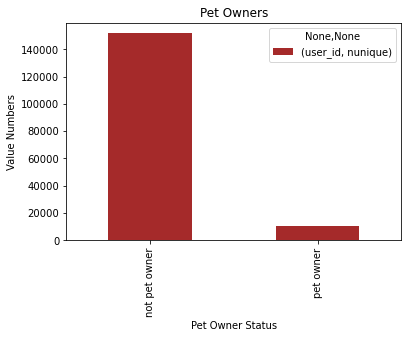

In [128]:
# 8.3.1 Bar chart for pet owner status
bar_pet_owner = df_pet_owner.plot.bar(color = ['brown'])
plt.xlabel('Pet Owner Status')
plt.ylabel('Value Numbers')
plt.title('Pet Owners')

The highest number of pet/non-pet-owner customers are non-pet-owners.

In [129]:
# Export bar chart
bar_pet_owner.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.pet_owners.png'), dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Pet Owner Status in US Regions')

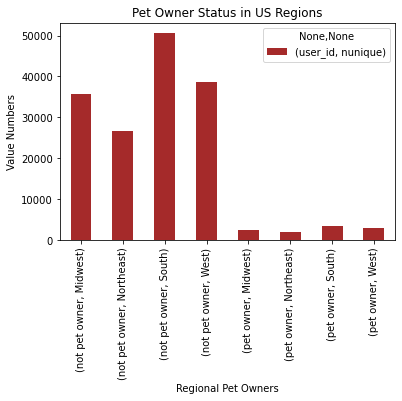

In [130]:
# 8.3.2 Bar chart for pet owner regional status
bar_pet_owner_regions = df_pet_owner_regions.plot.bar(color = ['brown'])
plt.xlabel('Regional Pet Owners')
plt.ylabel('Value Numbers')
plt.title('Pet Owner Status in US Regions')

The highest number of pet/non-pet-owner customers are non-pet owners from the South, followed by the West, Midwest, and Northeast regions respectively.

In [131]:
# Export Pet Owner Status in US Regions correlation bar chart
bar_pet_owner_regions.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10.pet_owners_regional.png'), dpi=300, bbox_inches='tight')

## 8.4 Visualization of 'Baby in the Family' and Regional Distribution

Text(0.5, 1.0, 'Families with Babies')

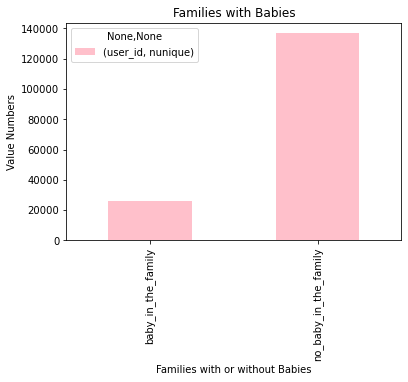

In [132]:
# 8.4.1 Bar Chart for Families with Babies
bar_baby_in_the_family = df_baby.plot.bar(color = ['pink'])
plt.xlabel('Families with or without Babies')
plt.ylabel('Value Numbers')
plt.title('Families with Babies')

In [133]:
# Export bar chart
bar_baby_in_the_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10._families_with_babies.png'), dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Families with Babies In Regions')

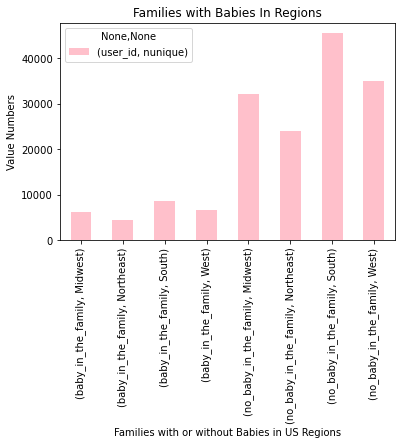

In [134]:
# 8.4.2 Bar Chart for Families with Babies and Regional Distribution
bar_baby_family_region = df_baby_region.plot.bar(color = ['pink'])
plt.xlabel('Families with or without Babies in US Regions')
plt.ylabel('Value Numbers')
plt.title('Families with Babies In Regions')



The highest number of families with/without baby customers are families without babies from the South, followed by the West, Midwest, and Northeast regions respectively.

In [135]:
# Export Families with Babies In Regions correlation bar chart
bar_baby_family_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10._families_babies_regions.png'), dpi=300, bbox_inches='tight')

## 8.5 Visualization of Parent Status and Regional Distribution

Text(0.5, 1.0, 'Parent Status')

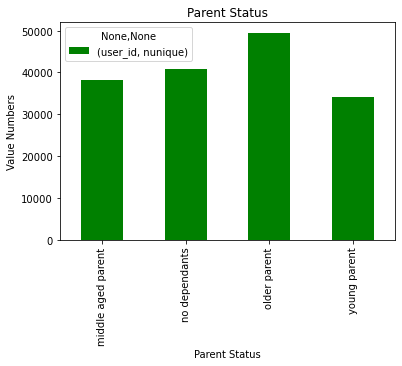

In [136]:
# 8.5.1 Bar Chart Parent Status
bar_parent_status = df_parent_status.plot.bar(color = ['Green'])
plt.xlabel('Parent Status')
plt.ylabel('Value Numbers')
plt.title('Parent Status')

In [137]:
# Export bar chart
bar_parent_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10._bar_parent_status.png'))

Text(0.5, 1.0, 'Parent Status in Various US Regions')

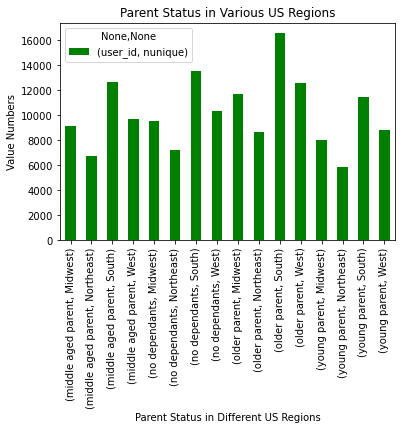

In [138]:
# 8.5.2 Bar Chart of Parent Status in US Regions
bar_parent_status_region = df_parent_status_region.plot.bar(color = ['Green'])
plt.xlabel('Parent Status in Different US Regions')
plt.ylabel('Value Numbers')
plt.title('Parent Status in Various US Regions')

In [139]:
# Export Parent Status in Various US Regions bar chart
bar_parent_status_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4.10._bar_parent_status_region.png'), dpi=300, bbox_inches='tight')

## 9. Aggregates of max, mean, and min Variables on Customer Profiles 

In [140]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price_ords', 'spending_flag', 'order_frequency',
       'customer_frequency_flag', 'gender', 'state', 'customer_age',
       'number_of_dependants', 'marital_status', 'annual_income',
       'state_region', 'activity_flag', 'parent_status', 'baby_in_the_family',
       'pet_owner', 'income_group'],
      dtype='object')

In [141]:
# Which departments have the highest frequency of product orders?
df.groupby('department_id').agg({'order_number' : ['max', 'min', 'mean', 'median']})

order_number                      
                       max min       mean median
department_id                                   
1                       99   5  20.311178     15
2                       99   5  22.258411     16
3                       99   5  21.987157     16
4                       99   5  22.597392     16
5                       99   5  20.644250     14
6                       99   5  21.489677     15
7                       99   5  21.951229     16
8                       99   5  19.914645     14
9                       99   5  20.839194     15
10                      99   5  24.707163     19
11                      99   5  21.147711     15
12                      99   5  20.630062     15
13                      99   5  21.585265     15
14                      99   5  21.635206     16
15                      99   5  21.047112     15
16                      99   5  22.386566     16
17                      99   5  20.589620     15
18                      99   5  23.714705     18
19                      99   5  21.891988     16
20                      99   5  21.277737     15
21                      99   5  26.978512     21

In [142]:
# Do customers in different regions have different 'order_hour_of_the_day' habits
df_region_order_hour = df.groupby('state_region').agg({'order_hour_of_day' : ['max', 'min', 'mean', 'median']})

In [143]:
df_region_order_hour

order_hour_of_day                      
                           max min       mean median
state_region                                        
Midwest                     23   0  13.382532     13
Northeast                   23   0  13.362289     13
South                       23   0  13.350743     13
West                        23   0  13.359373     13

In [144]:
df_region_order_hour.to_clipboard()

No difference in 'max', 'min', 'mean', 'median' order_hour_of_day between regions.

In [145]:
# Do customers in different regions have different 'orders_day_of_the_week' habits
df_region_order_day_of_week = df.groupby('state_region').agg({'orders_day_of_the_week' : ['max', 'min', 'mean', 'median']})

In [146]:
df_region_order_day_of_week

orders_day_of_the_week                     
                                max min      mean median
state_region                                            
Midwest                           6   0  2.747392      3
Northeast                         6   0  2.740971      3
South                             6   0  2.751614      3
West                              6   0  2.748497      3

In [147]:
df_region_order_day_of_week.to_clipboard()

There is no difference in popular order days between regions; most popular (median) orders being on Wednesdays.

In [148]:
# Do customers in different regions pay different 'prices'
df_region_prices = df.groupby('state_region').agg({'prices' : ['max', 'min', 'mean', 'median']})

In [149]:
df_region_prices

prices                      
                max  min      mean median
state_region                             
Midwest        25.0  1.0  7.790719    7.4
Northeast      25.0  1.0  7.781979    7.4
South          25.0  1.0  7.795570    7.4
West           25.0  1.0  7.790263    7.4

In [150]:
df_region_prices.to_clipboard()

There is no difference in customer aggregate prices per regions;  median prices being 7.4 in all regions.

In [151]:
# How does the order frequency differ amongst the various loyalty groups?
df_loyalty_order_number = df.groupby('loyalty_flag').agg({'order_number' : ['max']})

In [152]:
df_loyalty_order_number

,order_number
,max
loyalty_flag,
Loyal customer,99
New customer,10
Regular customer,40


In [153]:
df_loyalty_order_number.to_clipboard()

Text(0.5, 1.0, 'Customer loyalty and number of orders correlation')

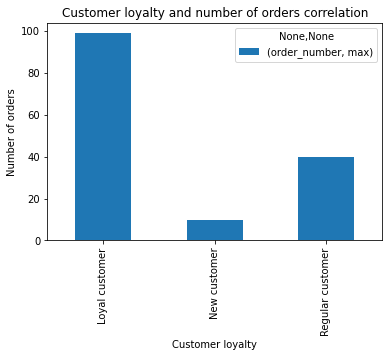

In [154]:
df_loyalty_order_number_stacked_bar = df_loyalty_order_number.plot.bar(stacked = True)
plt.xlabel('Customer loyalty')
plt.ylabel('Number of orders')
plt.title('Customer loyalty and number of orders correlation')

Loyal customers has a significantly higher number of orders in than new customers.

In [155]:
# Export Customer loyalty and number of orders correlation stacked bar
df_loyalty_order_number_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_loyalty_order_number_stacked_bar_4.10.png'), dpi=300, bbox_inches='tight')

In [156]:
# Customer loyalty and popular of order day of the week
df_loyalty_orders_per_week = df.groupby('loyalty_flag').agg({'orders_day_of_the_week' : ['mean']})

In [157]:
df_loyalty_orders_per_week

,orders_day_of_the_week
,mean
loyalty_flag,
Loyal customer,2.791182
New customer,2.704715
Regular customer,2.722702


Text(0.5, 1.0, 'Customer loyalty popular order day of the week correlation')

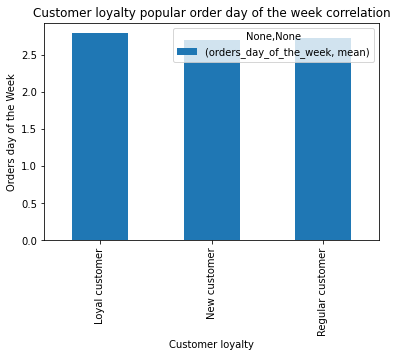

In [158]:
df_loyalty_orders_per_week_stacked_bar = df_loyalty_orders_per_week.plot.bar(stacked = True)
plt.xlabel('Customer loyalty')
plt.ylabel('Orders day of the Week')
plt.title('Customer loyalty popular order day of the week correlation')

Wednesday is the most popular day order day for all three loyalty groups.

In [159]:
# Export Customer loyalty popular order day of the week correlation stacked bar
df_loyalty_orders_per_week_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_loyalty_orders_per_week_stacked_bar_4.10.png'), dpi=300, bbox_inches='tight')

In [160]:
# Customer loyalty and days since last order
df_loyalty_days_since_prior_order = df.groupby('loyalty_flag').agg({'days_since_prior_order' : ['mean']})

In [161]:
df_loyalty_days_since_prior_order

,days_since_prior_order
,mean
loyalty_flag,
Loyal customer,5.954243
New customer,17.708364
Regular customer,11.917451


Loyal customers order more regularly than new and regular customers.

Text(0.5, 1.0, 'Customer loyalty and days since prior order correlation')

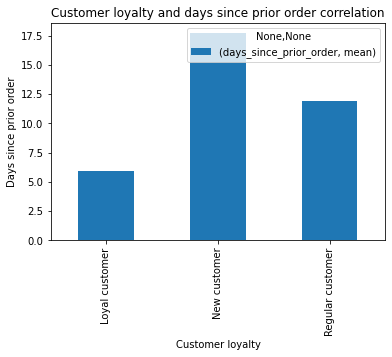

In [162]:
df_loyalty_days_since_prior_order_stacked_bar = df_loyalty_days_since_prior_order.plot.bar(stacked = True)
plt.xlabel('Customer loyalty')
plt.ylabel('Days since prior order')
plt.title('Customer loyalty and days since prior order correlation')

Loyal customers has much fewer days since prior order, which means that they order much more frequently than regular and new customers.

In [163]:
# Export Customer loyalty and days since prior order correlation stacked bar
df_loyalty_days_since_prior_order_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_loyalty_days_since_prior_order_stacked_bar_4.10.png'), dpi=300, bbox_inches='tight')

In [164]:
# Customer loyalty and price
df_loyalty_days_price = df.groupby('loyalty_flag').agg({'prices' : ['mean']})

In [165]:
df_loyalty_days_price

,prices
,mean
loyalty_flag,
Loyal customer,7.774434
New customer,7.802461
Regular customer,7.800892


Text(0.5, 1.0, 'Customer loyalty and price spent correlation')

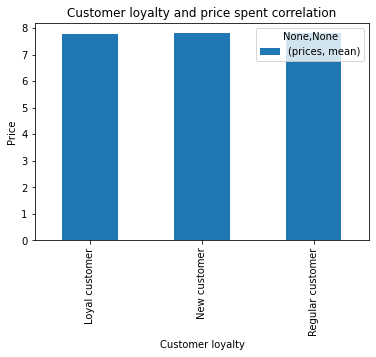

In [166]:
df_loyalty_days_price_stacked_bar = df_loyalty_days_price.plot.bar(stacked = True)
plt.xlabel('Customer loyalty')
plt.ylabel('Price')
plt.title('Customer loyalty and price spent correlation')

There is not a significant difference in mean prices paid between respective loyal customers.

In [167]:
# Export Income group and number of orders correlation
df_loyalty_days_price_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_loyalty_days_price_stacked_bar_4.10.png'), dpi=300, bbox_inches='tight')

In [168]:
# Do customers with higher income place more orders
df_income_group_number_of_orders = df.groupby('income_group').agg({'order_number' : ['mean']})
df_income_group_number_of_orders

,order_number
,mean
income_group,
High income,22.057247
Lower income,20.892077
Middle income,21.984532


Text(0.5, 1.0, 'Income group and number of orders correlation')

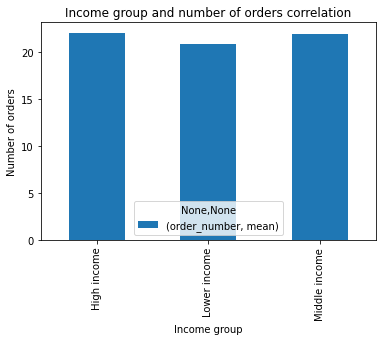

In [169]:
df_income_group_number_of_orders_stacked_bar = df_income_group_number_of_orders.plot.bar(stacked = True)
plt.xlabel('Income group')
plt.ylabel('Number of orders')
plt.title('Income group and number of orders correlation')

In [170]:
df_income_group_number_of_orders.to_clipboard()

Deduction: Higher income groups place more orders.

In [171]:
# Export Income group and number of orders correlation
df_income_group_number_of_orders_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_income_group_number_of_orders_stacked_bar_4.10.png'), dpi=300, bbox_inches='tight')

In [172]:
# Do customers with higher income do more frequent shopping?
df_income_group_days_since_order = df.groupby('income_group').agg({'days_since_prior_order' : ['mean']})
df_income_group_days_since_order

,days_since_prior_order
,mean
income_group,
High income,10.039029
Lower income,10.472628
Middle income,10.075658


Text(0.5, 1.0, 'Income group and days since prior order correlation')

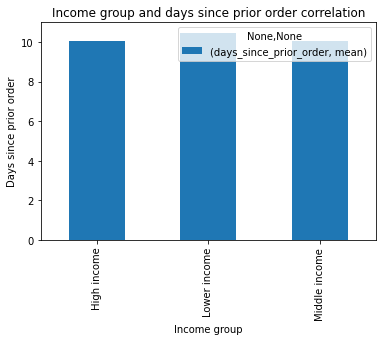

In [173]:
df_income_group_days_since_order_stacked_bar = df_income_group_days_since_order.plot.bar(stacked = True)
plt.xlabel('Income group')
plt.ylabel('Days since prior order')
plt.title('Income group and days since prior order correlation')

Conclusion: Low income groups shop marginally less regularly.

In [174]:
# Export Income group and days since prior order correlation bar chart
df_income_group_days_since_order_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_income_group_days_since_order_stacked_bar_4.10.png'), dpi=300, bbox_inches='tight')

In [175]:
# Do customers with higher income pay different prices?
df_income_prices = df.groupby('income_group').agg({'prices' : ['mean']})
df_income_prices

,prices
,mean
income_group,
High income,7.947764
Lower income,6.505783
Middle income,7.820085


Text(0.5, 1.0, 'Income group and prices correlation')

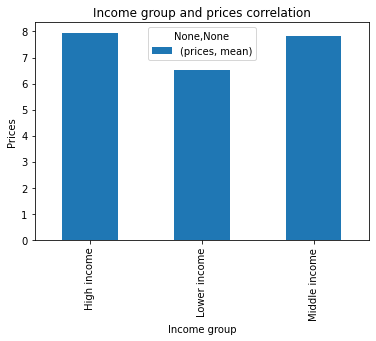

In [176]:
df_income_prices_stacked_bar = df_income_prices.plot.bar(stacked = True)
plt.xlabel('Income group')
plt.ylabel('Prices')
plt.title('Income group and prices correlation')

Lower income groups pay on average less per item. 

In [177]:
# Export Income group and prices correlation bar chart
df_income_prices_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_income_prices_4.10.png'), dpi=300, bbox_inches='tight')

In [178]:
# Do different parent status and hours of purchasing during the day?
df_parent_status_order_hour = df.groupby('parent_status').agg({'order_hour_of_day' : ['mean']})

In [179]:
df_parent_status_order_hour

,order_hour_of_day
,mean
parent_status,
middle aged parent,13.378273
no dependants,13.365235
older parent,13.363064
young parent,13.340621


Text(0.5, 1.0, 'Parent Status and Order Hour of the Day Correlation')

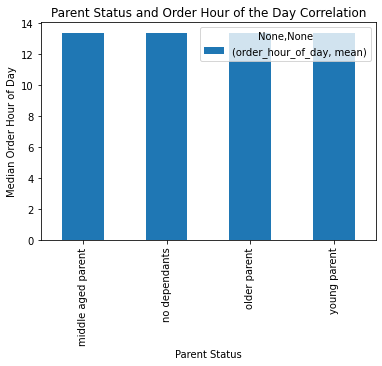

In [227]:
df_parent_status_order_hour_stacked_bar = df_parent_status_order_hour.plot.bar(stacked = True)
plt.xlabel('Parent Status')
plt.ylabel('Median Order Hour of Day')
plt.title('Parent Status and Order Hour of the Day Correlation')

Deduction: No significant correlation between parent status in different age groups and order time of the day.

In [228]:
# Export Parent Status and Order Hour of the Day Correlation bar chart
df_parent_status_order_hour_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_parent_status_order_hour_stacked_bar_4.10.png'), dpi=300, bbox_inches='tight')

In [229]:
# Is there correlation between parent status and order_frequency?
df_parent_status_days_since_order = df.groupby('parent_status').agg({'days_since_prior_order': ['mean']})
df_parent_status_days_since_order

,days_since_prior_order
,mean
parent_status,
middle aged parent,10.070106
no dependants,10.063515
older parent,10.110808
young parent,10.090730


In [230]:
df_parent_status_days_since_order.to_clipboard()

Text(0.5, 1.0, 'Parent Status and Days since Prior Order correlation')

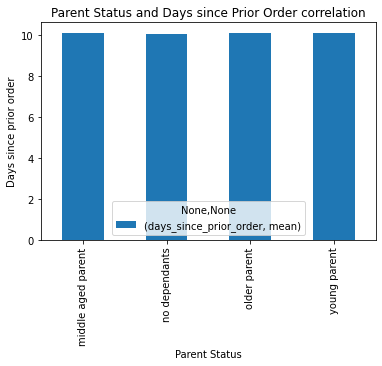

In [231]:
df_parent_status_days_since_order_stacked_bar = df_parent_status_days_since_order.plot.bar(stacked = True)
plt.xlabel('Parent Status')
plt.ylabel('Days since prior order')
plt.title('Parent Status and Days since Prior Order correlation')

Older parents marginally longer time since prior order. 

In [232]:
# Export Parent Status and Days since Prior Order correlation Bar Chart
df_parent_status_days_since_order_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_parent_status_days_since_order_stacked_bar_4.10.png'), dpi=300, bbox_inches='tight')

In [233]:
# Is there correlation between parent status and order_frequency?
df_parent_status_order_frequency = df.groupby('parent_status').agg({'order_frequency': ['mean']})

In [234]:
df_parent_status_order_frequency

,order_frequency
,mean
parent_status,
middle aged parent,8.807130
no dependants,8.783574
older parent,8.828871
young parent,8.822575


Text(0.5, 1.0, 'Parent Status and Order Frequency Correlation')

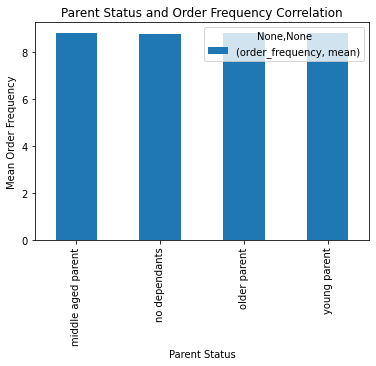

In [235]:
df_parent_status_order_frequency_stacked_bar = df_parent_status_order_frequency.plot.bar(stacked = True)
plt.xlabel('Parent Status')
plt.ylabel('Mean Order Frequency')
plt.title('Parent Status and Order Frequency Correlation')

Deduction: No significant correlation between parent status in different age groups and order frequency.

In [236]:
# Export baby_order_frequency Stacked Bar Chart
df_parent_status_order_frequency_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_parent_status_order_frequency_stacked_bar_4.10.png'), dpi=300, bbox_inches='tight')

In [237]:
# Is there correlation between parent status and prices?
df_parent_status_prices = df.groupby('parent_status').agg({'prices': ['mean']})
df_parent_status_prices

,prices
,mean
parent_status,
middle aged parent,7.791065
no dependants,7.790987
older parent,7.794027
young parent,7.785096


Text(0.5, 1.0, 'Parent Status and Prices correlation')

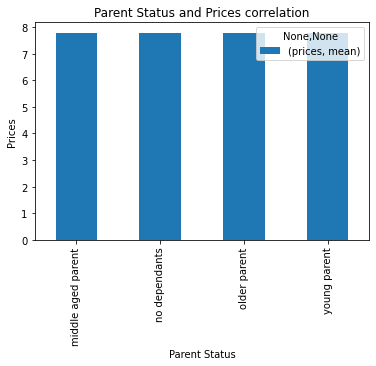

In [238]:
df_parent_status_prices_stacked_bar = df_parent_status_prices.plot.bar(stacked = True)
plt.xlabel('Parent Status')
plt.ylabel('Prices')
plt.title('Parent Status and Prices correlation')


Deduction: No significant correlation between parent status in different age groups and prices.

In [239]:
# Export Parent Status and Prices correlation Bar Chart
df_parent_status_prices_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_parent_status_prices_stacked_bar_4.10.png'), dpi=300, bbox_inches='tight')

In [240]:
# Is there correlation between parent status and number of dependents?
df.groupby('parent_status').agg({'number_of_dependants': ['mean', 'min', 'max']})

number_of_dependants        
                                   mean min max
parent_status                                  
middle aged parent             1.995744   1   3
no dependants                  0.000000   0   0
older parent                   2.007259   1   3
young parent                   2.004332   1   3

Deduction: No siginificant correlation between age and number of dependants.

In [241]:
# Do families with babies shop more frequent than families with no babies?
df_with_baby_order_frequency = df.groupby('baby_in_the_family').agg({'order_frequency' : ['mean']})

In [242]:
df_with_baby_order_frequency

,order_frequency
,mean
baby_in_the_family,
baby_in_the_family,7.439957
no_baby_in_the_family,9.457252


Text(0.5, 1.0, 'Families with/without Babies and Order Frequency Correlation')

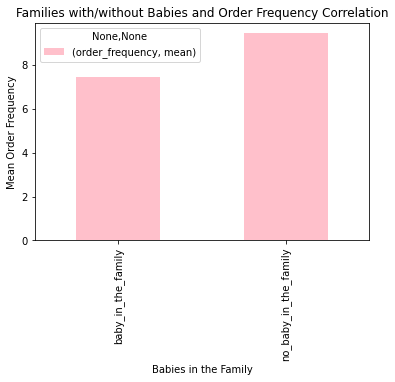

In [243]:
df_with_baby_order_frequency_stacked_bar = df_with_baby_order_frequency.plot.bar(color = ('pink'), stacked = True)
plt.xlabel('Babies in the Family')
plt.ylabel('Mean Order Frequency')
plt.title('Families with/without Babies and Order Frequency Correlation')

Deduction: Families with babies order more frequently than families without babies.

In [244]:
# Export baby_order_frequency Stacked Bar Chart
df_with_baby_order_frequency_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_with_baby_order_frequency_stacked_bar_4.10.png'), dpi=300, bbox_inches='tight', pad_inches=3)

In [245]:
# Do families with pets shop more frequent than families without pets?
df_pet_owner_order_frequency = df.groupby('pet_owner').agg({'order_frequency' : ['mean']})

In [246]:
df_pet_owner_order_frequency

,order_frequency
,mean
pet_owner,
not pet owner,8.897301
pet owner,8.097426


Text(0.5, 1.0, 'Families with/without Pets Order Frequency Correlation')

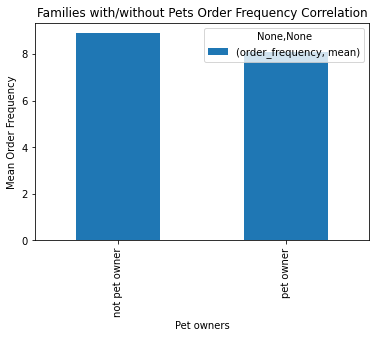

In [247]:
df_pet_owner_order_frequency_stacked_bar = df_pet_owner_order_frequency.plot.bar(stacked = True)
plt.xlabel('Pet owners')
plt.ylabel('Mean Order Frequency')
plt.title('Families with/without Pets Order Frequency Correlation')

Pet-owners order marginally more frequently than families without pets.

In [248]:
# Export baby_order_frequency Stacked Bar Chart
df_pet_owner_order_frequency_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_pet_owner_order_frequency_stacked_bar_4.10.png'), dpi=300, bbox_inches='tight')

In [249]:
# Do families with babies shop more frequent than families without babies?
df_baby_days_since_order = df.groupby('baby_in_the_family').agg({'days_since_prior_order' : ['mean']})

In [250]:
df_baby_days_since_order

,days_since_prior_order
,mean
baby_in_the_family,
baby_in_the_family,8.67141
no_baby_in_the_family,10.75136


Text(0.5, 1.0, 'Families with/without Babies and days_since_prior_order correlation')

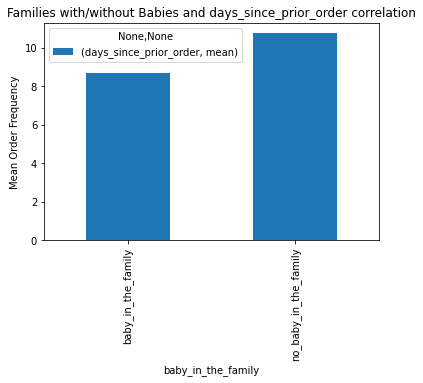

In [251]:
df_baby_days_since_order_stacked_bar = df_baby_days_since_order.plot.bar(stacked = True)
plt.xlabel('baby_in_the_family')
plt.ylabel('Mean Order Frequency')
plt.title('Families with/without Babies and days_since_prior_order correlation')

Families with babies tend to place orders marginally more frequently than families without babies.

In [252]:
# Export Stacked Bar Chart
df_baby_days_since_order_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_baby_days_since_order_stacked_bar_4.10.png'), dpi=300, bbox_inches='tight')

In [253]:
# Do pet-owners place orders more regularly than families without pets?
df_pet_owner_days_since_order = df.groupby('pet_owner').agg({'days_since_prior_order' : ['mean']})

In [254]:
df_pet_owner_days_since_order

,days_since_prior_order
,mean
pet_owner,
not pet owner,10.172996
pet owner,9.357751


Text(0.5, 1.0, 'Pet/non-pet owners days_since_prior_order correlation')

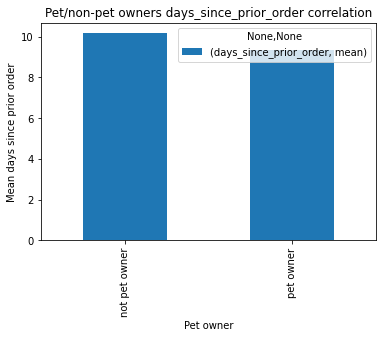

In [255]:
df_pet_owner_days_since_order_stacked_bar = df_pet_owner_days_since_order.plot.bar(stacked = True)
plt.xlabel('Pet owner')
plt.ylabel('Mean days since prior order')
plt.title('Pet/non-pet owners days_since_prior_order correlation')

Pet owners tend to place orders marginally more frequently than non-pet owners.

In [256]:
# Export Stacked Bar Chart
df_pet_owner_days_since_order_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_baby_days_since_order_4.10.png'), dpi=300, bbox_inches='tight')

In [257]:
# Is there correlation between age and order hour of day?
df_age_order_hour = df.groupby('order_hour_of_day').agg({'customer_age': ['mean']})

In [258]:
df_age_order_hour

,customer_age
,mean
order_hour_of_day,
0,49.004891
1,49.157787
2,48.889547
3,49.600735
4,49.485411
5,49.467539
6,49.306885
7,49.646115


Text(0.5, 1.0, 'Customer age and order hour of the day frequency correlation')

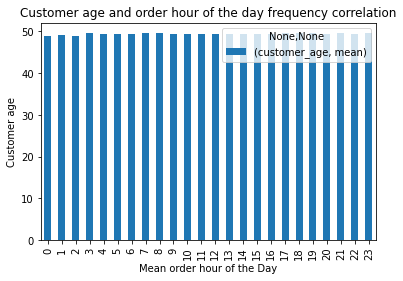

In [259]:
df_age_order_hour_stacked_bar = df_age_order_hour.plot.bar(stacked = True)
plt.xlabel('Mean order hour of the Day')
plt.ylabel('Customer age')
plt.title('Customer age and order hour of the day frequency correlation')

Deduction: No correlation between mean customer age and order hour of day.

In [260]:
# Export Stacked Bar Chart
df_age_order_hour_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_age_order_hour_stacked_bar_4.10.png'), dpi=300, bbox_inches='tight')

In [261]:
# Is there a difference between families with a baby_in_the_family and a customer's age?
df_baby_customer_age = df.groupby('baby_in_the_family').agg({'customer_age': ['mean']})

In [262]:
df_baby_customer_age

,customer_age
,mean
baby_in_the_family,
baby_in_the_family,49.506965
no_baby_in_the_family,49.434013


Text(0.5, 1.0, 'Customer age and Family with/without Baby correlation')

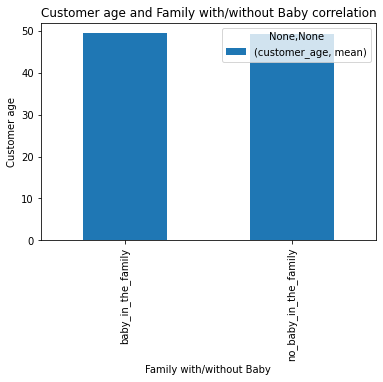

In [263]:
df_baby_customer_age = df_baby_customer_age.plot.bar(stacked = True)
plt.xlabel('Family with/without Baby')
plt.ylabel('Customer age')
plt.title('Customer age and Family with/without Baby correlation')

Deduction: No significant correlation between 'customer age' and families with/without a 'baby_in_the_family'.

In [264]:
# Export Stacked Bar Chart
df_baby_customer_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'df_baby_customer_age.10.png'), dpi=300, bbox_inches='tight')

## 10. Compare Customer Profiles with Regions & Departments  

In [265]:
# Frequency of product orders in respective Departments
dept_freq = df['department_id'].value_counts(dropna = False)
dept_freq

4     7227091
16    4116777
19    2187121
7     2036447
1     1627614
13    1385375
3      883330
15     787790
20     783011
9      633725
17     539349
14     524945
12     523890
18     335947
11     328480
6      197900
5      107972
8       72111
21      57567
10      27558
2       27166
Name: department_id, dtype: int64

In [266]:
dept_freq.to_clipboard()

In [267]:
# Frequency of customer visits. How often do they return to Instacart
frequent_customers = df['loyalty_flag'].value_counts(dropna = False)
frequent_customers

Regular customer    12742472
Loyal customer       9554250
New customer         2114444
Name: loyalty_flag, dtype: int64

In [268]:
frequent_customers.to_clipboard()

## 10.1 Income

In [269]:
# Income group by department
crosstab_income_department = pd.crosstab(df_customer_profile['department_id'], df_customer_profile['income_group'], dropna = False)

In [270]:
crosstab_income_department

income_group,High income,Lower income,Middle income
department_id,,,
1,495103,76502,1056009
2,8196,1544,17426
3,271166,37912,574252
4,2170897,296229,4759965
5,35642,6059,66271
6,59901,7554,130445
7,579556,150700,1306191
8,23341,3364,45406
9,196031,21542,416152


In [271]:
crosstab_income_department.to_clipboard()

All three income groups have the same departments in their top 5 list of spending habits.

In [272]:
# Income group by region
crosstab_income_region = pd.crosstab(df_customer_profile['state_region'], df_customer_profile['income_group'], dropna = False)

In [273]:
crosstab_income_region

income_group,High income,Lower income,Middle income
state_region,,,
Midwest,1726481,290035,3694280
Northeast,1286887,220368,2807428
South,2387287,431379,5309117
West,1847478,308641,4101785


In [274]:
crosstab_income_region.to_clipboard()

## 10.2 Pet Owner

In [275]:
# Pet Owner by Department
crosstab_pet_owner_department = pd.crosstab(df_customer_profile['department_id'], df_customer_profile['pet_owner'], dropna = False)

In [276]:
crosstab_pet_owner_department

pet_owner,not pet owner,pet owner
department_id,,
1,1418385,209229
2,23146,4020
3,778259,105071
4,6634401,592690
5,87851,20121
6,174523,23377
7,1792923,243524
8,0,72111
9,558284,75441


In [277]:
crosstab_pet_owner_department.to_clipboard()

Pet owner's top 5 departments are similar to non-pet owners; however, pet orders from the pets department are only 8th in line. 

In [278]:
# Pet_owner group by region
crosstab_pet_owner_region = pd.crosstab(df_customer_profile['state_region'], df_customer_profile['pet_owner'], dropna = False)

In [279]:
crosstab_pet_owner_region

pet_owner,not pet owner,pet owner
state_region,,
Midwest,5073578,637218
Northeast,3858768,455915
South,7282883,844900
West,5564525,693379


In [280]:
crosstab_pet_owner_region.to_clipboard()

## 10.3 Baby In the Family

In [281]:
# Families with/out babies by Department
crosstab_baby_in_the_family_department = pd.crosstab(df_customer_profile['department_id'], df_customer_profile['baby_in_the_family'], dropna = False)

In [282]:
crosstab_baby_in_the_family_department

baby_in_the_family,baby_in_the_family,no_baby_in_the_family
department_id,,
1,530363,1097251
2,8964,18202
3,290303,593027
4,2249054,4978037
5,15903,92069
6,59661,138239
7,516211,1520236
8,18240,53871
9,229047,404678


In [283]:

crosstab_baby_in_the_family_department.to_clipboard()

Families 'without a baby in the family' return most to aisles 4 (produce) and 16 (dairy, eggs) and less so, but a noticeable return to aisles 1 (frozen), 7 (beverages), 13 (pantry), and 19 (snacks).
Families 'with a baby in the family' similarly spend most in aisles 4 (produce) and 16 (dairy, eggs); and regularly but less so, in aisles 1 (frozen), 7 (beverages), 13 (pantry), and 19 (snacks).
There appears to be proportionally far less families 'with a baby in the family' than families 'without a baby in the family'. 

In [284]:
# Baby in the family group by region
crosstab_baby_in_the_family_region = pd.crosstab(df_customer_profile['state_region'], df_customer_profile['baby_in_the_family'], dropna = False)

In [285]:
crosstab_baby_in_the_family_region

baby_in_the_family,baby_in_the_family,no_baby_in_the_family
state_region,,
Midwest,1833658,3877138
Northeast,1399155,2915528
South,2609592,5518191
West,1976910,4280994


In [286]:
crosstab_baby_in_the_family_region.to_clipboard()

## 10.4 Parent Status

In [287]:
# Parent Status by departments
crosstab_parent_status_department = pd.crosstab(df_customer_profile['department_id'], df_customer_profile['parent_status'],  dropna = False)

In [288]:
crosstab_parent_status_department

parent_status,middle aged parent,no dependants,older parent,young parent
department_id,,,,
1,383799,405513,491896,346406
2,6295,6935,8056,5880
3,208107,221599,266464,187160
4,1705041,1812885,2182149,1527016
5,24005,27959,31859,24149
6,46968,50038,58888,42006
7,477511,512055,621749,425132
8,16207,18250,22556,15098
9,150440,157414,191044,134827


In [289]:
crosstab_parent_status_department.to_clipboard()

In [290]:
# parent_status group by region
crosstab_parent_status_region = pd.crosstab(df_customer_profile['state_region'], df_customer_profile['parent_status'], dropna = False)

In [291]:
crosstab_parent_status_region

parent_status,middle aged parent,no dependants,older parent,young parent
state_region,,,,
Midwest,1371717,1436736,1702925,1199418
Northeast,1011325,1064991,1321004,917363
South,1901243,2038001,2444495,1744044
West,1476097,1564382,1897590,1319835


In [292]:
crosstab_parent_status_region.to_clipboard()

Significant return/spending habits in department 4 (produce) and slightly less so in department 16 (dairy, eggs); Regular but noticeable return/spending habits, in aisles 1 (frozen), 7 (beverages), 13 (pantry), and 19 (snacks). Highest to lowest frequency groups of return to respective departments: older parents, no dependent, middle aged parents, and young parents.

## 11. Visualizations of Customer Profiles by Department

Text(0.5, 1.0, 'Income Group and Department Correlation')

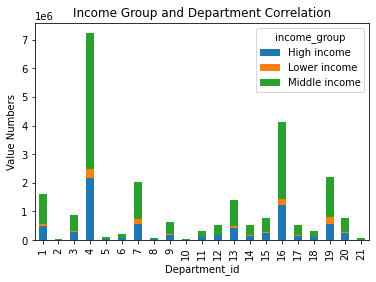

In [293]:
# 1. Income and department Stacked Bar chart 
income_department_stacked_bar = crosstab_income_department.plot.bar(stacked = True)
plt.xlabel('Department_id')
plt.ylabel('Value Numbers')
plt.title('Income Group and Department Correlation')

In [294]:
# Export Income and Department Stacked Bar Chart
income_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_department_stacked_bar_4.10.png'), dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Pet Owners and Department Correlation')

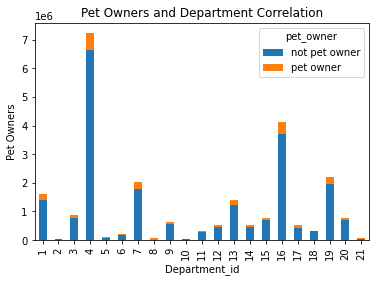

In [295]:
# 2. Pet Owner and department Stacked Bar chart 
pet_owner_stacked_bar = crosstab_pet_owner_department.plot.bar(stacked = True)
plt.xlabel('Department_id')
plt.ylabel('Pet Owners')
plt.title('Pet Owners and Department Correlation')

In [296]:
# Export Pet Owner and Department Stacked Bar chart 
pet_owner_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_owner_stacked_bar_4.10.png'), dpi=300, bbox_inches='tight')

Deduction: Non-pet-owner families appear to spend a significant amount in aisle 4 (produce) and 16 (dairy, eggs); and regularly but less so, in aisles 1 (frozen), 7 (beverages), 13 (pantry), and 19 (snacks).
Pet-owners spend the most in aisles 4 (produce) and 16 (dairy, eggs); and regular but noticeable spending habits, in aisles 1 (frozen), 7 (beverages), 13 (pantry), and 19 (snacks).
There appear to be proportionally far less pet-owners than non-pet-owner customers.

Text(0.5, 1.0, 'Families with/out Babies and Department Correlation')

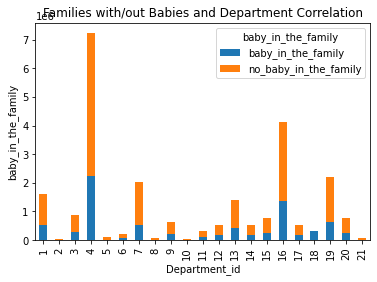

In [297]:
# 3. Families with/out babies and Department Stacked Bar chart 
baby_in_the_family_stacked_bar = crosstab_baby_in_the_family_department.plot.bar(stacked = True)
plt.xlabel('Department_id')
plt.ylabel('baby_in_the_family')
plt.title('Families with/out Babies and Department Correlation')

Families 'without a baby in the family' spend most in aisles 4 (produce) and 16 (dairy, eggs) and regularly but less so, in aisles 1 (frozen), 7 (beverages), 13 (pantry), and 19 (snacks).
Families 'with a baby in the family' spend most in aisles 4 (produce) and 16 (dairy, eggs); and regularly but less so, in aisles 1 (frozen), 7 (beverages), 13 (pantry), and 19 (snacks).
There appear to be proportionally far less families 'with a baby in the family' than families 'without a baby in the family'.

In [298]:
# Export Stacked Bar Chart
baby_in_the_family_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'baby_in_the_family_stacked_bar_4.10.png'))

Text(0.5, 1.0, 'Parent Status and Department Correlation')

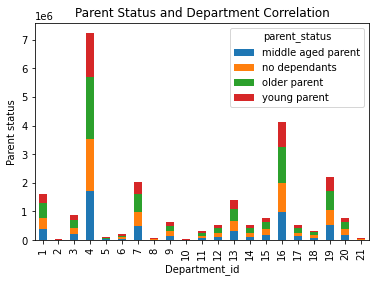

In [299]:
# 4. Parent Life Stage and Department Stacked Bar chart 
parent_status_stacked_bar = crosstab_parent_status_department.plot.bar(stacked = True)
plt.xlabel('Department_id')
plt.ylabel('Parent status')
plt.title('Parent Status and Department Correlation')

Significant return/spending habits in department 4 (produce) and slightly less so in department 16 (dairy, eggs); Regular but noticeable return/spending habits, in aisles 1 (frozen), 7 (beverages), 13 (pantry), and 19 (snacks). Highest to lowest frequency groups of return to respective departments: older parents, no dependent, middle aged parents, and young parents. 

In [300]:
# Export Stacked Bar Chart
parent_status_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_status_stacked_bar_4.10.png'), dpi=300, bbox_inches='tight')

In [301]:
df.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,customer_age,number_of_dependants,marital_status,annual_income,state_region,activity_flag,parent_status,baby_in_the_family,pet_owner,income_group
0,431534,1,5,4,15,28.0,196,1,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner,Middle income
1,3367565,1,6,2,7,19.0,196,1,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner,Middle income
2,550135,1,7,1,9,20.0,196,1,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner,Middle income
3,3108588,1,8,1,14,14.0,196,2,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner,Middle income
4,2295261,1,9,1,16,0.0,196,4,1,both,...,31,3,married,40423,South,high_activity,young parent,no_baby_in_the_family,not pet owner,Middle income


In [302]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price_ords', 'spending_flag', 'order_frequency',
       'customer_frequency_flag', 'gender', 'state', 'customer_age',
       'number_of_dependants', 'marital_status', 'annual_income',
       'state_region', 'activity_flag', 'parent_status', 'baby_in_the_family',
       'pet_owner', 'income_group'],
      dtype='object')

In [303]:
# Export data
df.to_csv(os.path.join(path, '03 Scripts', 'final_task_4.10.csv')) 